# logarithmic measure of D

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy.linalg import eig
from scipy.optimize import curve_fit

In [2]:
nrep = 20  # number of replications
#path_main = "C:/Users/Sachith/Desktop/work_oh/bulk_water/"
path_main = "C:/Users/Sachith/Desktop/work_oh/different_water_density/water10/" 
path = [None] * (nrep)
nn = 0
while (nn<nrep):
    path[nn] = path_main +'md'+str(nn+1)
    nn = nn+1


path.remove("C:/Users/Sachith/Desktop/work_oh/different_water_density/water10/md1")
#path.remove("C:/Users/Sachith/Desktop/work_oh/different_water_density/water20/md8")
#path.remove("C:/Users/Sachith/Desktop/work_oh/Differnt_separations/15_13/water_20/md20")
#path.remove("C:/Users/Sachith/Desktop/work_oh/Differnt_separations/15_13/water_20/md18")
#path.remove("C:/Users/Sachith/Desktop/work_oh/Differnt_separations/15_13/water_20/md19")
#path.remove("C:/Users/Sachith/Desktop/work_oh/different_substituents/(CO)NH2/md23")

In [3]:
nrep =len(path)
nrep

19

In [4]:
f=open(path[0] +'/input_data.dat','r')
lines=f.readlines()
for line in lines[0:]:
    data=line.split()
    if data[0]=='nsteps:':
        nsteps = int(data[1])
    if data[0]=='natoms:':
        natoms = int(data[1])
    if data[0]=='nonmvat:':
        nonmvat = int(data[1])
    if data[0]=='nmovingatoms:':
        nmovingatoms = int(data[1])
    if data[0]=='MDRestartFrequency:':
        MDRestartFrequency = int(data[1])
    if data[0]=='dt:':
        dt = float(data[1])
    if data[0]=='noh:':
        noh = int(data[1])
    if data[0]=='nwater:':
        nwater = int(data[1])
    if data[0]=='nox:':
        nox = int(data[1])
    if data[0]=='nhy:':
        nhy = int(data[1])
    if data[0]=='xbox:':
        xbox = float(data[1])
    if data[0]=='ybox:':
        ybox = float(data[1])
    if data[0]=='zbox:':
        zbox = float(data[1])

nsteps = int((nsteps/MDRestartFrequency)+1)-1 #+ int((nsteps2/MDRestartFrequency)+1)-2 #+int((nsteps3/MDRestartFrequency)+1)
nsteps = 1090
nstep = nsteps
        
print('nsteps:','  ',nsteps )
print('natoms:','  ',natoms)
print('nonmvat:','  ',nonmvat)
print('nmovingatoms:','  ',nmovingatoms)
print('MDRestartFrequency:','  ',MDRestartFrequency)
print('dt:','  ',dt)
print('noh:','  ',noh)
print('nwater:','  ',nwater)
print('nox:','  ',nox)
print('nhy:','  ',nhy)
print('xbox:','  ',xbox)
print('ybox:','  ',ybox)
print('zbox:','  ',zbox)

nsteps:    1090
natoms:    293
nonmvat:    261
nmovingatoms:    32
MDRestartFrequency:    10
dt:    1.0
noh:    1
nwater:    10
nox:    11
nhy:    21
xbox:    12.664
ybox:    13.3552
zbox:    40.0


In [5]:
x_oh = np.empty(nsteps*nrep).reshape(nrep,nsteps)
y_oh = np.empty(nsteps*nrep).reshape(nrep,nsteps)
z_oh = np.empty(nsteps*nrep).reshape(nrep,nsteps)

In [6]:
kk = 0
while (kk<nrep):
    ii = 0
    f=open(path[kk] +'/oh1.dat','r')
    lines=f.readlines()
    for line in lines[:nstep]:
        data=line.split()
        x_oh[kk,ii]=float(data[2])
        y_oh[kk,ii]=float(data[3])
        z_oh[kk,ii]=float(data[4])
        ii = ii+1
    f.close()
    kk = kk+1

In [7]:
kk = 0
while (kk<nrep):

    ll = 0
    x_old = x_oh[kk,0]
    y_old = y_oh[kk,0]
    while ll<(nsteps):
        ijk = 1
        while ijk < 2:
            ijk = ijk+1
            if abs(x_oh[kk,ll]-x_old)>5:
                if x_oh[kk,ll]>x_old:
                    x_oh[kk,ll] = x_oh[kk,ll]-xbox
                    ijk = 1
                elif x_oh[kk,ll]<x_old:
                    x_oh[kk,ll] = x_oh[kk,ll]+xbox
                    ijk = 1
            if abs(y_oh[kk,ll]-y_old)>5: # atom need to be moved in y
                if y_oh[kk,ll]>y_old:
                    y_oh[kk,ll] = y_oh[kk,ll]-ybox
                    ijk = 1
                elif y_oh[kk,ll]<y_old:
                    y_oh[kk,ll] = y_oh[kk,ll]+ybox
                    ijk = 1
        x_old = x_oh[kk,ll]
        y_old = y_oh[kk,ll]
        ll = ll+1
    
    
    kk = kk+1

In [8]:
nbin = 15
his = []

In [9]:
ll = 0
kk = 29
dt = 0.01+(kk*0.01)
print(dt)
hs = []
while ll<nrep:
    jj = 0
    while jj< ((nsteps/(kk+1))-1):
#        dr = ((x_oh[ll,(jj*(kk+1)+kk+1)]-x_oh[ll,jj*(kk+1)])**2)+((y_oh[ll,(jj*(kk+1)+kk+1)]-y_oh[ll,jj*(kk+1)])**2)
        dr = ((x_oh[ll,(jj+kk+1)]-x_oh[ll,jj])**2)+((y_oh[ll,(jj+kk+1)]-y_oh[ll,jj])**2)
        ss = dr/(4*dt)
        nta = math.log10(ss)
        hs.append(nta)
        jj = jj+1   
    ll = ll+1


0.3


In [10]:
print(min(hs))
print(max(hs))

-3.728703803547755
0.8316267299548702


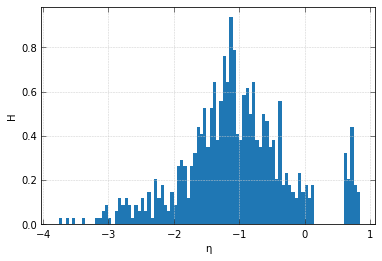

In [11]:
his, n, patches =plt.hist(hs,bins = np.arange(-3.8, 0.9, 0.05),density=True)
plt.xlabel('η')
plt.ylabel('H')
plt.tick_params(axis="x",which='major', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='major',direction="in", length=5, width=0.5)
plt.tick_params(axis="x",which='minor', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='minor',direction="in", length=5, width=0.5)
plt.grid(which='major',color='#CCCCCC', linestyle='--', linewidth=0.5)
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0),useMathText=True)
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.savefig(path[0] +'/hist006.jpg', dpi=400)
plt.show() 

In [12]:
i=0
nta = np.empty((len(n)-1))
while i<(len(n)-1):
    nta[i] = (n[i]+n[i+1])/2
    i = i+1
len(nta)

93

In [13]:
nta[75]

-0.025000000000013234

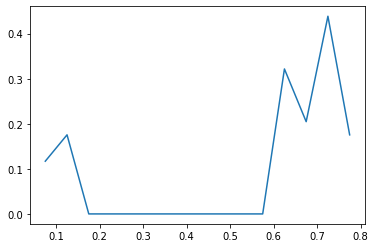

In [14]:
plt.figure()
plt.plot(nta[77:-1],his[77:-1])

In [15]:
def func(x, sig):
    lam = 2*np.log(10)*dt/sig**2
    y =  (lam*10**x)*np.exp(-2*dt*10**x/sig**2)
    return y

def func1(x, sig,lam):
    y =  (lam*10**x)*np.exp(-2*dt*10**x/sig**2)
    return y

al1 = 0.9
def func2(x, sig1,sig2,lam1,lam2):
    y =  ((al1*lam1*10**x)*np.exp(-2*dt*10**x/sig1**2))+(((1-al1)*lam2*10**x)*np.exp(-2*dt*10**x/sig2**2))
    return y

def func21(x, sig1,sig2):
    lam1 = 2*np.log(10)*dt/sig1**2
    lam2 = 2*np.log(10)*dt/sig2**2
    y =  ((al1*lam1*10**x)*np.exp(-2*dt*10**x/sig1**2))+(((1-al1)*lam2*10**x)*np.exp(-2*dt*10**x/sig2**2))
    return y

guess = 0.9
nta_1 = np.copy(nta[0:])
his_1 = np.copy(his[0:])
parameters, covariance = curve_fit(func, nta_1, his_1,p0=guess)
#p0 = (0.2,0.3)
#parameters, covariance = curve_fit(func21, nta[:], his[:],p0 = p0)
parameters

array([0.25735225])

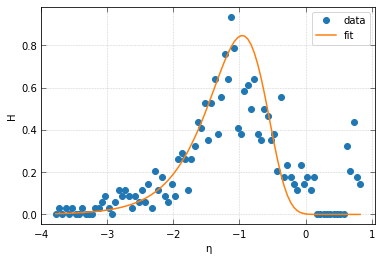

In [16]:
#fit_y = func1(nta, parameters[0], parameters[1])
fit_y = func(nta_1, parameters[0])
#fit_y = func2(nta, parameters[0],parameters[1],parameters[2],parameters[3])
#fit_y = func21(nta, parameters[0],parameters[1])
plt.plot(nta_1, his_1, 'o', label='data')
plt.plot(nta_1, fit_y, '-', label='fit')
plt.xlabel('η')
plt.ylabel('H')
plt.tick_params(axis="x",which='major', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='major',direction="in", length=5, width=0.5)
plt.tick_params(axis="x",which='minor', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='minor',direction="in", length=5, width=0.5)
plt.grid(which='major',color='#CCCCCC', linestyle='--', linewidth=0.5)
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0),useMathText=True)
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.legend()
#plt.savefig(path[0] +'/Hvsη.jpg', dpi=400)

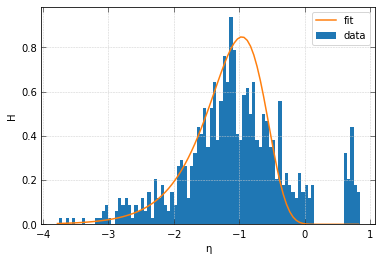

In [17]:
#fit_y = func1(nta, parameters[0], parameters[1])
fit_y = func(nta, parameters[0])
his, n, patches =plt.hist(hs,bins = np.arange(-3.8, 0.9, 0.05),density=True ,label='data')
#fit_y = func2(nta, parameters[0],parameters[1],parameters[2],parameters[3])
#fit_y = func21(nta, parameters[0],parameters[1])
#plt.plot(nta, his, 'o', label='data')
plt.plot(nta, fit_y, '-', label='fit')
plt.xlabel('η')
plt.ylabel('H')
plt.tick_params(axis="x",which='major', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='major',direction="in", length=5, width=0.5)
plt.tick_params(axis="x",which='minor', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='minor',direction="in", length=5, width=0.5)
plt.grid(which='major',color='#CCCCCC', linestyle='--', linewidth=0.5)
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0),useMathText=True)
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.legend()
plt.savefig(path[0] +'/Hvsη.jpg', dpi=400)

In [18]:
err = np.sqrt(np.sum((his-fit_y)**2)/len(his))
print(err,'     ',len(his))

#np.sqrt((np.sum((his-fit_y)**2)/len(his))/(np.sum(fit_y**2)/len(his)))

0.14106784654424753       93


In [19]:
sigma = parameters[0]
#lambd = parameters[1]

In [20]:
2*np.log(10)*dt/sigma**2

20.859840520247204

In [21]:
#lambd

In [22]:
sigma**2/(2*dt)

0.11038363839642426

In [23]:
dt

0.3

In [24]:
#orvalaped time intervel and finc
dtt= np.array([0.01,   0.05,   0.1,    0.2,    0.3,      0.4,    0.5,    0.6,    0.7,   0.8])
dd = np.array([0.09729,0.38936,0.51311,0.61633,0.6757346,0.69904,0.62365,0.62411,0.6124,0.555112820])
er = [0.015302,0.0366830,0.04900454,0.08149,0.132847,0.11496728,0.1279670,0.12942516,0.1738469,0.1819643] # error of sigma
sig = np.sqrt(2.0*dd*dtt)
er2 = 2*sig*er # errpr of D

In [25]:
#unorvalaped time intervel and finc1
dtt= np.array([0.01,   0.05,   0.1,    0.2,    0.3,      0.4,    0.5,    0.6,    0.7,   0.8])
dd = np.array([0.09729,0.37306,0.48543,0.54778,0.54564,0.529603,0.505647,0.47858,0.5376,0.45172])
er = [0.01526,0.02675,0.05195,0.06298,0.06550,0.085181,0.084609,0.10802,0.1009,0.14249] # error of sigma
sig = np.sqrt(2.0*dd*dtt)
er2 = 2*sig*er # errpr of D

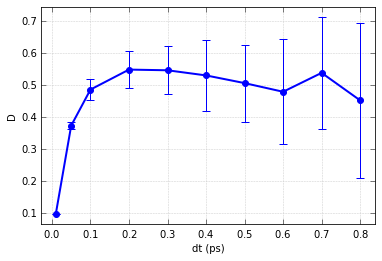

In [26]:
plt.figure()
plt.plot(dtt[:],dd[:],color='b',linewidth=2)
plt.xlabel('dt (ps)')
plt.ylabel('D')
plt.errorbar(dtt[:],dd[:], yerr = er2[:],fmt ='o',color='b',markersize=6,linewidth=1,capsize=4)
plt.tick_params(axis="x",which='major', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='major',direction="in", length=5, width=0.5)
plt.tick_params(axis="x",which='minor', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='minor',direction="in", length=5, width=0.5)
plt.grid(which='major',color='#CCCCCC', linestyle='--', linewidth=0.5)
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0),useMathText=True)
plt.tick_params(bottom=True, top=True, left=True, right=True)
#plt.savefig(path[0] +'/DvsDt.jpg', dpi=400)

In [27]:
len(weights)

NameError: name 'weights' is not defined

In [ ]:
his_1